In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def pwm2Thrust(pwm):
    thrust = 0.5*(pwm-1500)
    return thrust

def move(thrusters, changeThrust, thrustDir, mass, extForce):
    thrust = np.zeros(8)
    force = np.zeros(3)
    newThrusters = thrusters + changeThrust
    
    for i in range(0,len(thrusters)):
        if newThrusters[i] > 1900:
            newThrusters[i] = 1900
        elif newThrusters[i] < 1100:
            newThrusters[i] = 1100
        thrust[i] = pwm2Thrust(newThrusters[i])
        force = force + thrust[i] * thrustDir[i]
    force = force + extForce
    acc = force/mass
    return acc

def newState(position, vel, acc, dt):
    velNew = np.zeros(3)
    positionNew = np.zeros(3)
    for i in range(0,len(vel)):
        velNew[i] = vel[i] + acc[i]*dt
    for i in range(0,len(position)):
        velAvg = (vel[i] + velNew[i])/2
        positionNew[i] = position[i] + velAvg*dt
    for i in range(0,len(positionNew)):
        if positionNew[i] < 0:
            positionNew[i] = 0
            velNew[i] = 0
    return positionNew, velNew

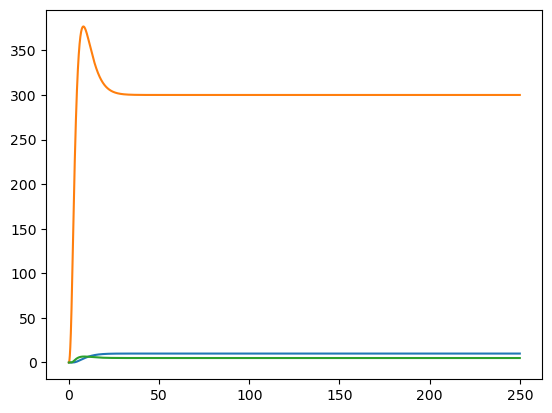

In [3]:
dir1 = np.array([np.cos(np.pi/4), np.sin(np.pi/4), 0])
dir2 = np.array([-np.cos(np.pi/4), np.sin(np.pi/4), 0])
dir3 = np.array([0, 0, 1])
dir4 = np.array([0, 0, -1])
dir5 = np.array([0, 0, -1])
dir6 = np.array([0, 0, 1])
dir7 = np.array([-np.cos(np.pi/4), np.sin(np.pi/4), 0])
dir8 = np.array([np.cos(np.pi/4), np.sin(np.pi/4), 0])
thrustDir = np.array([dir1, dir2, dir3, dir4, dir5, dir6, dir7, dir8])

zPos = 2
yPos = 1
xPos = 0

targetX = 5
targetY = 300
targetZ = 10
targetPos = np.array([targetX, targetY, targetZ])

m = 10 #kg
dt = 0.01 #s
time = np.arange(0,250,dt)
position = np.zeros([len(time),3])
velocity = np.zeros([len(time),3])
K = 4
Kd = 10
Ki = 0.5




thrusters = np.array([1500, 1500, 1500, 1500, 1500, 1500, 1500, 1500])
changeThrust = np.array([0,0,0,0,0,0,0,0])
posErr = 0
prevErr = 0
trackErr = 0

g = 9.8 #m/s^2
gForce = [0,0,-m*g]
extForce = gForce
for i in range(0,len(time)-1):
    changeThrust = np.array([0,0,0,0,0,0,0,0])
    posErr = targetPos - position[i]
    diffErr = posErr-prevErr
    trackErr = trackErr + posErr
    u = posErr*K + diffErr/dt*Kd + trackErr*Ki*dt
    
    zControl = np.array([0, 0, 1, -1, -1, 1, 0, 0])
    yControl = np.array([1, 1, 0, 0, 0, 0, 1, 1])
    xControl = np.array([1, -1, 0, 0, 0, 0, -1, 1])
    
    changeThrust = u[0]*xControl + u[1]*yControl + u[2]*zControl
    
    acc = move(thrusters, changeThrust, thrustDir, m, extForce)
    [position[i+1], velocity[i+1]] = newState(position[i], velocity[i], acc, dt)
    
    prevErr = posErr


plt.plot(time,position[:,zPos])
plt.plot(time,position[:,yPos])
plt.plot(time,position[:,xPos])
    
    



In [90]:
#Sandbox
a = np.array([1,2,3,4])
b = np.array([3,4,5,6])
c = a+b
c[3]

a = np.array([1,2,3,4])
b = np.array([7,6,5,4])
c = np.array([a,b])
c[1]

a = 4
b = 6
print(a, ", ", b)
c = [1,2,3]
max(c)

4 ,  6


3

In [16]:
a = np.zeros([1,8])
b = np.array([2.4,5.6,4.3,6,7,8,6,5])
a+b
np.cos(np.pi/4)

0.7071067811865476

In [7]:
def trial():
    return 3,4
[a,b] = np.array(trial())
a

3

In [36]:
a = np.zeros([1,3])
print(a[0][1])

0.0


In [66]:
a = np.zeros([8,2])
a[:,0]

array([0., 0., 0., 0., 0., 0., 0., 0.])